In [2]:
#what kind of apps to research
searches=[]
searches.append('https://play.google.com/store/search?q=kids%20drawing&c=apps')

In [3]:
##getting URLS and titile of the company
from bs4 import BeautifulSoup as bs
from selenium import webdriver
path="C:/bin/chromedriver.exe"

import time
import random
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
chrome_options = Options()
#chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(path, options = chrome_options)
time.sleep(3)
driver.quit()

urls=[]
urls=[]
titles=[]
for search in searches:
    driver = webdriver.Chrome(path)
    
    driver.get(search) # Start the browser and open 'url'
    
    assert 'Apps' in driver.title # Wait for the page to load
    
    # time.sleep(5)
    SCROLL_PAUSE_TIME = 5

    # Get scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait to load page
        time.sleep(SCROLL_PAUSE_TIME)

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height
    wait = WebDriverWait(driver, 10)
    wait.until(EC.visibility_of_element_located((By.CLASS_NAME, "BDUOnf")))
    
#    time.sleep(random.uniform(15,25))
    
    html = driver.page_source # Get the html of the page
    
    driver.quit()
    
    index = html.find('<h2 class="sv0AUd bs3Xnd">Apps</h2>')
    html2 = html[index:]  
   
        #SAME CODE AS BEFORE STARTS HERE
    soup = bs(html2, "html.parser")
    relevant= soup.find_all('div', class_="kCSSQe")
    #print (relevant)
    
    for a in soup.find_all('a', href=True):
        urls.append('https://play.google.com'+a['href']+'&showAllReviews=true')
    for div in relevant:
        for html_class in div.find_all('div', class_="WsMG1c nnK0zc"):
            sublink = html_class.find('title')
            title=html_class.getText().strip('“”')
            #print(link)
            titles.append(title)

In [4]:
urls

['https://play.google.com/store/apps/details?id=com.binibambini.MiniLite&showAllReviews=true',
 'https://play.google.com/store/apps/details?id=com.binibambini.MiniLite&showAllReviews=true',
 'https://play.google.com/store/apps/details?id=com.binibambini.MiniLite&showAllReviews=true',
 'https://play.google.com/store/apps/dev?id=5493827619333849158&showAllReviews=true',
 'https://play.google.com/store/apps/details?id=com.binibambini.MiniLite&showAllReviews=true',
 'https://play.google.com/store/apps/details?id=com.doodlejoy.studio.kidsdoojoy&showAllReviews=true',
 'https://play.google.com/store/apps/details?id=com.doodlejoy.studio.kidsdoojoy&showAllReviews=true',
 'https://play.google.com/store/apps/details?id=com.doodlejoy.studio.kidsdoojoy&showAllReviews=true',
 'https://play.google.com/store/apps/developer?id=Doodle+Joy+Studio&showAllReviews=true',
 'https://play.google.com/store/apps/details?id=com.doodlejoy.studio.kidsdoojoy&showAllReviews=true',
 'https://play.google.com/store/apps

In [125]:
#we can choose the number of companys we want to research. The order of apps is the exact order that appear on the internet.
urls=list(dict.fromkeys(urls))
newurls=[]

In [126]:
for i in range(0,len(urls)):
    if '/apps/details?id' in urls[i]: 
        newurls.append(urls[i])

In [130]:
# we can also change the amount of reviews we collected. usually, customers will not review millions of reviews to decide wether to download
#an app or not, so we just grab the first 40 reviews of an app.
from bs4 import BeautifulSoup as bs
from selenium import webdriver
path="C:/bin/chromedriver.exe"

import time
import random
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
chrome_options = Options()
#chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(path, options = chrome_options)
time.sleep(3)
driver.quit()

review=[]
score=[]
appnames=[]
for url in newurls:
    driver = webdriver.Chrome(path)
    
    driver.get(url) # Start the browser and open 'url'
    
   # assert 'Reviews' in driver.title)  Wait for the page to load
    
    # time.sleep(5)
    SCROLL_PAUSE_TIME = 5

    # Get scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait to load page
        time.sleep(SCROLL_PAUSE_TIME)

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height
    wait = WebDriverWait(driver, 10)
    wait.until(EC.visibility_of_element_located((By.CLASS_NAME, "Njo8s")))
    
#    time.sleep(random.uniform(15,25))
    
    html = driver.page_source # Get the html of the page
    
    driver.quit()
    a=html.find('title" content="')
    b=html.find('"><title id="main-title">')
    appname=html[a+16:b]
    index = html.find('<h2 class="Rm6Gwb">Reviews</h2>')
    html2 = html[index:]  
   
        #SAME CODE AS BEFORE STARTS HERE
    for i in range(1,6):
        index = html.find('<h2 class="Rm6Gwb">Reviews</h2>')
        html2 = html[index:]
        while html2.find('\n,'+str(i)+',null,"') != -1: 

            #We are running a while loop because we want to get everything in the page
        
            start=html2.find('\n,'+str(i)+',null,"')+10
            html2=html2[start:]
            end=html2.find('",[')
            review.append(html2[:end])
            score.append(i)
            appnames.append(appname)
            html2=html2[end:]
    
            index = html2.find('",["')
            html2=html2[index:]
            
            

In [45]:
a=html.find('+",')
htmld=html[a:]
b=htmld.find(',"')
htmld[3:b].split(',')


['50000000', '60413758']

In [131]:
review

['Probablly one of the best implemented painting apps for kids, unfortunately rendered practically useless by excessively intrusive ads.. I get the need for ad revenue, but can it not be better placed so as to allow reasonable use of the app by kids rather than hindering it.. That way you can be assured of ad revenue from those willing to use the app than deleting it which is more likely in its current design',
 "Kids coloring pages - art for kids is good application. This works fanatics. It's perdition are almost accurate. It's a useful application. I like this so much.",
 'Kids coloring pages is such an amazing application. I liked this application so much. It is easy to use. Thanks for making such an amazing application.',
 'Wooow thats amazing. Kids coloring pages is a very interesting app for kids. Now download for your kids and enjoy the best app. I like it so much.',
 'It is wonderful app has multiple interesting things ,even my 2 Year baby girl like It alot.she Enjoy a lot when

In [132]:
len(review)

6009

In [134]:
import csv
col=[appnames,score,review]
col
rows=zip(*col)

rows=list(rows)
filename='apps_records.csv'
with open(filename,'w',newline='',encoding="utf-8") as out:
    w=csv.writer(out)
    w.writerow(["appname","score","review"])
    w.writerows(rows)

In [111]:
col

[['Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  'Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  'Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  'Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  'Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  'Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  'Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  'Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  'Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  'Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  'Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  'Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  'Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  'Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  'Kids Doodle - Color &amp; Draw Free Game - Ap

In [112]:
rows

[('Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  1,
  "Why do people say that are no ads? This app is loaded with ads. On top of every drawing and random full-screen ads. My four year old daughter didn't like the all because of the random ads."),
 ('Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  1,
  "Can't re-download paid version. I paid for the ad free version a long while ago, yet it is not available to re download again. Would happily pay again for an ad free version"),
 ('Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  1,
  'This is good at starting but when i quit and start again its not show black board it show white board.'),
 ('Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  1,
  "From no ads to ads galore, and you can't pay to remove them."),
 ('Kids Doodle - Color &amp; Draw Free Game - Apps on Google Play',
  2,
  'Kept this app for years but updates have now resulted in banner ads covering a si

In [135]:
import numpy as np
a=np.unique(appnames)
len(a)

218

In [3]:
len(newurls)

NameError: name 'newurls' is not defined

'<html lang="en" dir="ltr"><head><script type="text/javascript" async="" src="https://www.gstatic.com/recaptcha/releases/UFwvoDBMjc8LiYc1DKXiAomK/recaptcha__en.js" crossorigin="anonymous" integrity="sha384-K2LYnZEtBUcW6O6eiKyrX5HgXfaBzWmW7BmI0mEp+JFPi3pZyyiJwjMDjI12BtQg" nonce=""></script><script async="" src="https://www.google-analytics.com/analytics.js" nonce=""></script><base href="https://play.google.com/"><meta name="referrer" content="origin"><link rel="search" href="/opensearch.xml" type="application/opensearchdescription+xml" title="Google Play"><link rel="shortcut icon" href="//www.gstatic.com/android/market_images/web/favicon_v2.ico"><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.uhBKOtz6fOw.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo8GZHNTtpcfighnqAH0uUZTALLzrw/cb=gapi.loaded_0" nonce="" async=""></script><script data-id="_gd" nonce="">window.WIZ_global_data = {"DpimGf":false,"EP1ykd":["/_/*","/covid19/exposurenotifications/sel
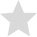
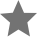
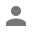
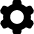
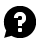
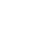
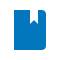
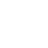
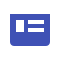
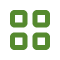
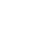
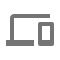
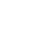
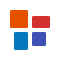
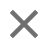
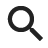
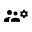
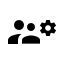
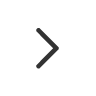
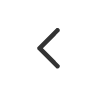
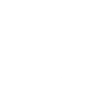
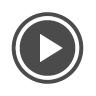
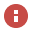
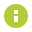
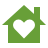
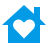
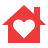
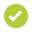
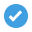
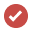

In [5]:
html